In [2]:
import pandas as pd
import numpy as np
from Backtester.metrics import PerformanceMetrics

In [5]:
# Create synthetic portfolio performance data (1 trading year)
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=252)  # 252 trading days
returns = np.random.normal(0.0005, 0.01, len(dates))  # mean 0.05%, std 1%
total_value = 100000 * (1 + returns).cumprod()

df = pd.DataFrame({"TotalValue": total_value}, index=dates)
df.head()


,TotalValue
2020-01-01,100546.714153
2020-01-02,100457.967298
2020-01-03,101158.851022
2020-01-04,102750.109951
2020-01-05,102560.892156


In [6]:
pm = PerformanceMetrics(df)
pm.df.head()

,TotalValue,DailyReturn
2020-01-02,100457.967298,-0.000883
2020-01-03,101158.851022,0.006977
2020-01-04,102750.109951,0.015730
2020-01-05,102560.892156,-0.001842
2020-01-06,102372.039650,-0.001841


In [7]:
sharpe = pm.sharpe_ratio()
print("Sharpe Ratio:", sharpe)
assert isinstance(sharpe, float)
assert -5 < sharpe < 5


Sharpe Ratio: 0.5949843325445289


In [11]:
dd = pm.max_drawdown()
print("Max Drawdown (sample):")
print(dd.head())
assert isinstance(dd, pd.Series)
assert dd.min() <= 0
assert dd.max() == 0

Max Drawdown (sample):
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.000000
2020-01-05   -0.001842
2020-01-06   -0.003680
Freq: D, Name: TotalValue, dtype: float64


In [12]:
cagr = pm.cagr()
print("CAGR:", cagr)
assert isinstance(cagr, float)
assert -1 < cagr < 1


CAGR: 0.15766255223196812


In [13]:
win_rate = pm.win_rate()
print("Win Rate:", win_rate)
assert 0 <= win_rate <= 1


Win Rate: 0.5298804780876494


In [15]:
summary = pm.summary()
print(" Performance Summary ")
print(summary)

expected_keys = ["Sharpe Ratio", "Max Drawdown", "CAGR", "Win Rate"]
for key in expected_keys:
    assert key in summary.index


 Performance Summary 
Sharpe Ratio                                                0.595
Max Drawdown    2020-01-02    0.000
2020-01-03    0.000
2020-0...
CAGR                                                       15.77%
Win Rate                                                   52.99%
dtype: object


Plotting daily returns distribution...


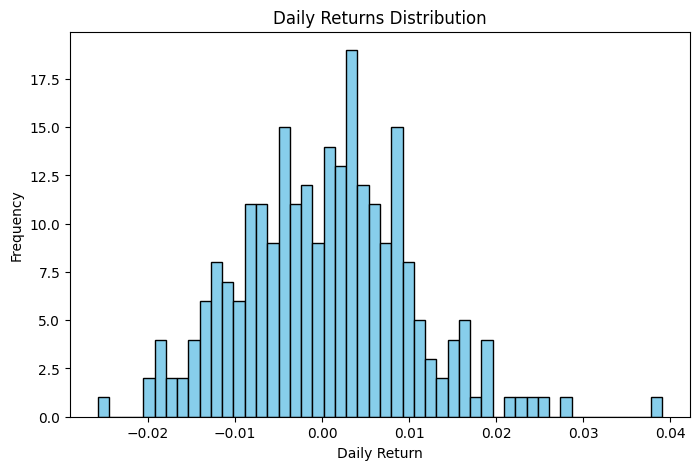

In [16]:
print("Plotting daily returns distribution...")
pm.plot_return_distribution()


In [17]:
print("All metrics successfully tested ")

# Quick validation summary
print(f"\nSharpe: {sharpe:.3f}")
print(f"CAGR: {cagr*100:.2f}%")
print(f"Win rate: {win_rate*100:.2f}%")
print(f"Max drawdown (min): {dd.min()*100:.2f}%")


All metrics successfully tested ✅

Sharpe: 0.595
CAGR: 15.77%
Win rate: 52.99%
Max drawdown (min): -13.53%
